# Сбор постов Вконтакте по #хештегу

Автор: Шмаков Сергей
* http://freesmm.ru
* https://vk.com/smmblog
* https://vk.com/freesmm - сборник бесплатных скриптов для SMM
* https://youtube.com/smmblog

* **Вопросы по скрипту/доработки** : https://new.vk.com/topic-41212221_34161499

> Хотите научиться самостоятельно делать такие скрипты? Проходите бесплатный курс по программированию адаптированные для SMM-щиков http://freesmm.tilda.ws/page241764.html

## Что умеет скрипт
* Собирать основные данные в таблицу (без текста\фото и прочего)
* Экспресс-анализ данных

Нужны доработки? обращайтесь - vk.me/smmblog

## Шаг 0 - подключить пакеты

In [14]:
import time as t 
import csv
import datetime as dt
from datetime import datetime, date, time, timedelta
import requests
import itertools
%matplotlib inline

## Шаг 1 - получить токен ВКонтакте

Для получения токена перейдите по ссылке и скопируйте нужную часть в блок ниже
https://oauth.vk.com/authorize?client_id=5453402&display=page&redirect_uri=http://localhost&scope=&response_type=token&v=5.53
![alt](https://api.monosnap.com/rpc/file/download?id=H72wV79ObVw7rLBfJO8T4jOJ25szXW)

In [150]:
token = 'вставить токен'

## Шаг 2 - задать запрос

In [151]:
q = 'vinci' #без знака # только одно слово.

## Шаг 3 - создать csv с колонками

Создаём файл и записываем колонки таблицы (создаёт новую или перезаписывает **полностью** старую)

In [152]:
with open(q+'.csv', 'w', newline='', encoding='UTF-8') as csvfile:
                            datawriter = csv.writer(csvfile, delimiter=';',
                                                quotechar='|', quoting=csv.QUOTE_MINIMAL)


                            datawriter.writerow(['date']+['owner_id']+['post_id']+['likes']+
                                                        ['reposts']+['comments']+

                                                        ['coordinates']+  
                                                        #не трогать, не работает.
                                                        #['place_country']+['city']+['address']+['coordinates']+                                                            
                                                        #['place_id']+['latitude']+['longitude']+
                                                        #['created']+['updated']+['checkins']+                                                            

                                                        ['post_type']+
                                                        ['platform']+['platform_type'])

In [ ]:
i = 0
while True:

    if i == 0:
        b = datetime.now() #текущее время

        end_time = 1475508828 #int(t.mktime(b.timetuple())) #подставить unix-время если требуется сбор с определённого момента
        
        print('Цербер начал собирать посты с:', end_time, dt.datetime.fromtimestamp( #функция преобразования
                        int(end_time)
                        ).strftime('%Y-%m-%d %H:%M:%S'))

        i = 1

    else:
        end_time = r[0] #возвращает ВК крайнее время от которого нужно опускаться дальше



    r = requests.post('https://api.vk.com/method/execute.Shmakov_search_post?q='+str(q)
                      +'&end_time='+str(end_time)
                      +'&access_token='+token).json()['response']
    #print('крайнее время, должно совпадать',r[0])
    

    #print(len(r[1])) - сколько постов собрано за раз



    #print(time_start)

    for i in r[1]:


        date = i['date'] #дата поста

        owner_id = i['owner_id'] #создатель поста
        post_id = i['id'] #id поста

        likes = i['likes']['count'] #количество лайков
        reposts = i['reposts']['count']  #количество репостов
        comments = i['comments']['count'] #количество комментариев
        geo = i.setdefault('geo', None) 


        if geo == None:
            coordinates = None
        else:
            '''
            place_id = i['geo']['place'].setdefault('id',None)
            latitude = geo['place'].setdefault('latitude',None) #широта места
            longitude = geo['place'].setdefault('longitude',None) #долгота места
            created= geo['place'].setdefault('created',None) # дата создания места
            updated= geo['place'].setdefault('updated',None) # дата обновления информации о месте
            checkins= geo['place'].setdefault('checkins',None) #количество чекинов в этом месте
            place_name = i['geo'].setdefault('title',None)
            country = i['geo'].setdefault('country',None)
            city = i['geo'].setdefault('city',None)
            address = i['geo'].setdefault('address',None)

            '''
            coordinates= geo.setdefault('coordinates',None) #координаты пользователя         


        post_type = i['post_type']

        platform = i['post_source'].setdefault('platform','direct')
        platform_type = i['post_source'].setdefault('type',None)
        platform_url = i['post_source'].setdefault('url',None)



        with open(str(q)+'.csv', 'a', newline='', encoding='UTF-8') as csvfile:
                                    datawriter = csv.writer(csvfile, delimiter=';',
                                                        quotechar='|', quoting=csv.QUOTE_MINIMAL)


                                    datawriter.writerow([date]+[owner_id]+[post_id]+[likes]+
                                                        [reposts]+[comments]+

                                                        #[geo]+
                                                        [coordinates]+ 

                                                        #не трогать - не работает
                                                        #[country]+[city]+[address]+                                                           
                                                        #[place_id]+[latitude]+[longitude]+
                                                        #[created]+[updated]+[checkins]+


                                                        [post_type]+
                                                        [platform]+[platform_type])
    print('Цербер собрал посты до:',r[0],dt.datetime.fromtimestamp( #функция преобразования
                        int(r[0])
                        ).strftime('%Y-%m-%d %H:%M:%S'))
    t.sleep(30) 

In [80]:
import numpy as np
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [164]:
df = pd.read_csv(str(q)+'.csv', delimiter=';', encoding='UTF-8',error_bad_lines=False, parse_dates=True)

In [165]:
df.head()

,date,owner_id,post_id,likes,reposts,comments,coordinates,post_type,platform,platform_type
0,1477743102,-131803463,738,0,0,0,NaN,reply,direct,mvk
1,1477742854,343870044,1004,0,0,0,NaN,post,direct,vk
2,1477742834,94359618,13196,0,0,0,NaN,post,instagram,api
3,1477742572,150538526,19,0,0,0,NaN,post,direct,vk
4,1477742312,150538526,15,0,0,0,NaN,post,direct,vk


удалим дубликаты. возможны будут если перезаписывать файл

In [ ]:
df.drop_duplicates() #удалит дубликаты если перезаписывали файл

переведём unix-time в нормальное время

In [167]:
df['date'] = pd.to_datetime(df['date'],unit='s') 

сгруппируем данные по дням

In [168]:
group_by_day = df.set_index('date').groupby(pd.TimeGrouper('D')).count()
group_by_day.head()

,owner_id,post_id,likes,reposts,comments,coordinates,post_type,platform,platform_type
date,,,,,,,,,
2016-08-18,250,250,250,250,250,18,250,250,250
2016-08-19,427,427,427,427,427,22,427,427,427
2016-08-20,456,456,456,456,456,25,456,456,456
2016-08-21,511,511,511,511,511,30,511,511,511
2016-08-22,410,410,410,410,410,32,410,410,410


Нарисуем график количества публикация за каждый день

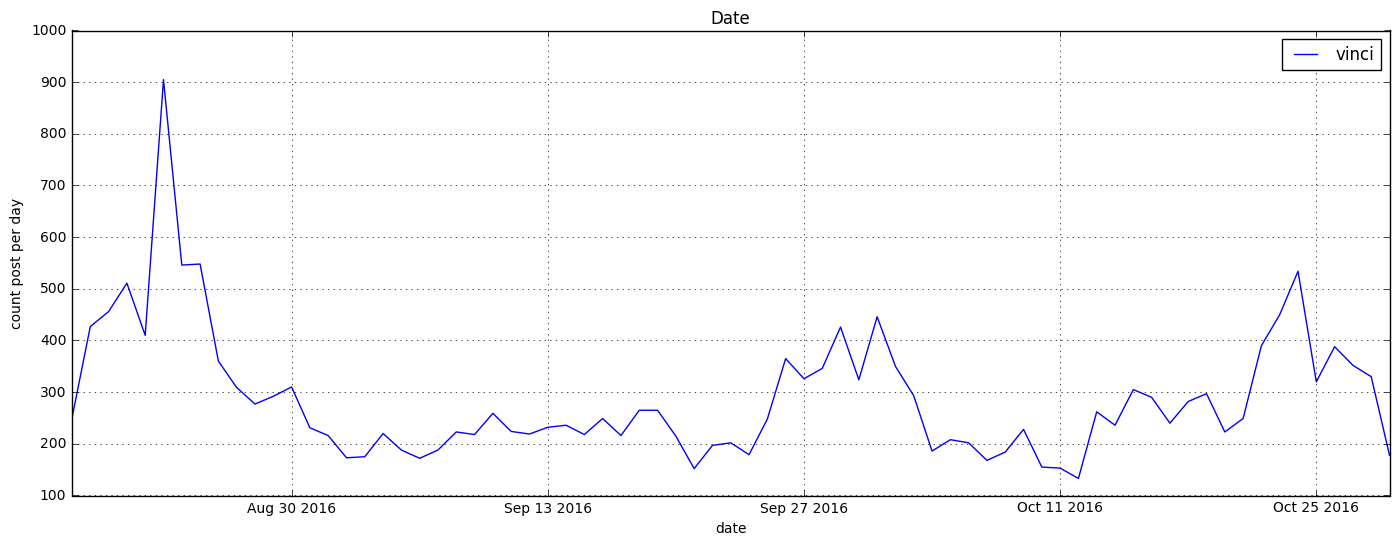

In [169]:
plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Date')
plt.xlabel('date') #подпись оси x
plt.ylabel('count post per day') #подпись оси y
plt.grid()
plt.plot(group_by_day['owner_id'],label=str(q)) #что рисуем и в какой форме: точка и др.

plt.legend()

In [170]:
platform = df.groupby(df['platform']).count()
platform

,date,owner_id,post_id,likes,reposts,comments,coordinates,post_type,platform_type
platform,,,,,,,,,
android,2676,2676,2676,2676,2676,2676,30,2676,2676
chronicle,11,11,11,11,11,11,0,11,11
direct,3917,3917,3917,3917,3917,3917,9,3917,3917
instagram,3807,3807,3807,3807,3807,3807,1252,3807,3807
ipad,60,60,60,60,60,60,0,60,60
iphone,499,499,499,499,499,499,11,499,499
prisma,1,1,1,1,1,1,0,1,1
vinci,5602,5602,5602,5602,5602,5602,19,5602,5602
wphone,4427,4427,4427,4427,4427,4427,25,4427,4427


In [171]:
platform_sort = platform.sort_values(['platform_type'],ascending=0)

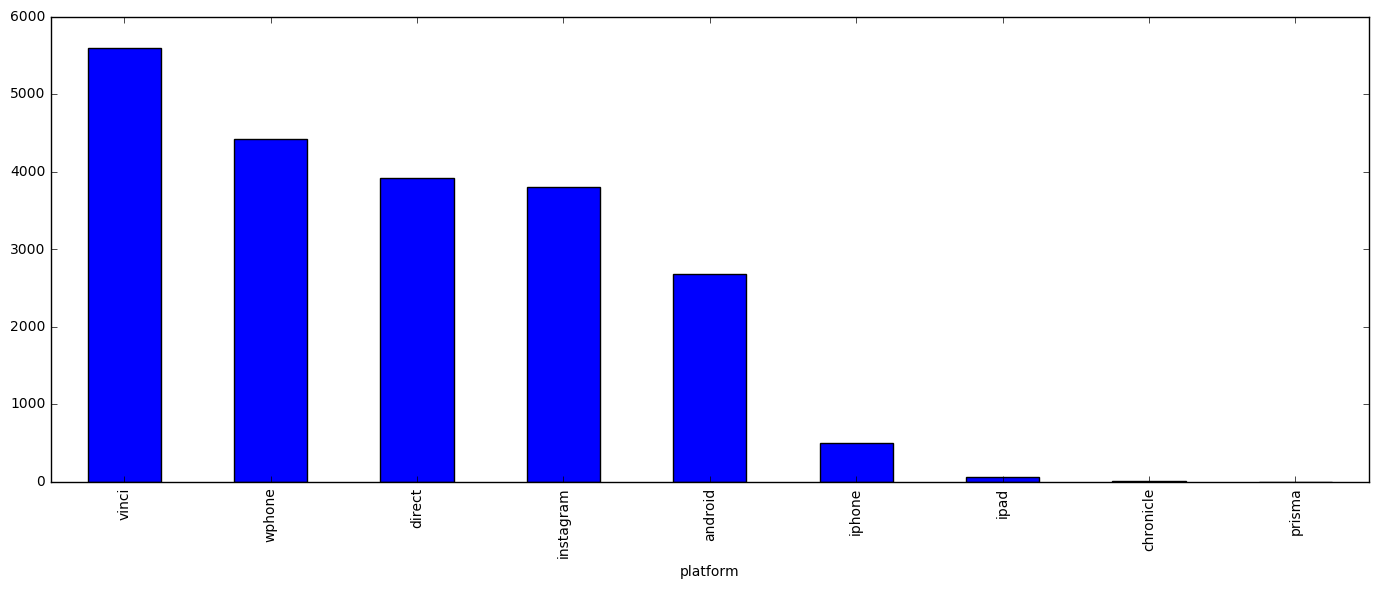

In [172]:
plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика
plt.grid()
platform_sort['platform_type'].plot(kind='bar')